In [1]:
import os, fnmatch, glob, h5py
from matplotlib.mlab import psd as get_psd_and_freqs
import numpy as np
import correlation
import matplotlib.pyplot as plt
import bead_util as bu
import matplotlib.pyplot as plt
import bead_util as bu
import numpy as np
import os, time
import numpy as np
import matplotlib, calendar
import matplotlib.pyplot as plt
import os, re, time, glob
import bead_util as bu
import scipy.signal as sp
import scipy.optimize as opt
import cPickle as pickle
from scipy.optimize import curve_fit

In [2]:
directory_names = []
for root, dirnames, filenames in os.walk('/data/'):
    for dirname in fnmatch.filter(dirnames, '*charge*'):
        if root[0:12]=='/data/201706':
            directory_names.append(root+'/'+dirname)
directory_names = sorted(list(set(directory_names)))

In [3]:
def getphase(fname):
        #print "Getting phase from: ", fname 
        dat, attribs, cf = bu.getdata(os.path.join(path, fname))
        fsamp = attribs["Fsamp"]
        xdat = dat[:,data_columns[1]]

        xdat = np.append(xdat, np.zeros( int(fsamp/fdrive) ))
        corr2 = np.correlate(xdat,dat[:,drive_column])
        maxv = np.argmax(corr2) 

        cf.close()

        #print maxv
        return maxv


def getdata(fname, maxv):
    #print "Processing ", fname
    dat, attribs, cf = bu.getdata(os.path.join(path, fname))

    if( len(attribs) > 0 ):
        fsamp = attribs["Fsamp"]

    xdat = dat[:,data_columns[1]]

    lentrace = len(xdat)
    ## zero pad one cycle
    MinusDC = dat[:,drive_column]
    corr_full = bu.corr_func(MinusDC - np.median(MinusDC), xdat, fsamp, fdrive)

    return corr_full[0], np.max(corr_full) 


def get_most_recent_file(p):

    ## only consider single frequency files, not chirps
    filelist = glob.glob(os.path.join(p,"*.h5"))  ##os.listdir(p)
    #filelist = [filelist[0]]
    mtime = 0
    mrf = ""
    for fin in filelist:
        if( fin[-3:] != ".h5" ):
            continue
        f = os.path.join(path, fin) 
        if os.path.getmtime(f)>mtime:
            mrf = f
            mtime = os.path.getmtime(f)

    fnum = re.findall('\d+.h5', mrf)[0][:-3]
    return mrf#.replace(fnum, str(int(fnum)-1))


def list_file_time_order(p):
    #filelist = glob.glob(os.path.join(p,"*20Vpp*.h5"))
    filelist = glob.glob(os.path.join(p,"*.h5"))
    filelist.sort(key=os.path.getmtime)
    return filelist


def Line(A, B):
    return 0.0*A + 1.0*B

/data/20170602/bead1_15um_QWP/TEST_DAQ/charge


bead_util.py:296: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  corr = np.zeros(fsamp / fdrive)
bead_util.py:297: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  response = np.append(response, np.zeros(fsamp / fdrive - 1))


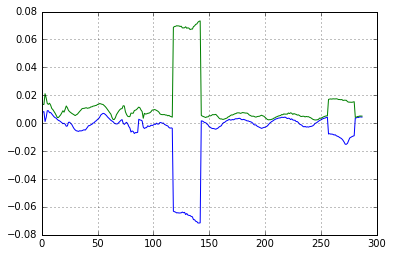

/data/20170602/bead4_15um_QWP/charge1
Warning, got no keys for:  /data/20170602/bead4_15um_QWP/charge1/test_xyzcool_G20_att_synth10mV41Hz-5mVdc_5.h5


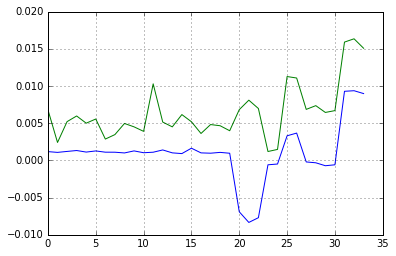

/data/20170602/bead9_15um_QWP/charge1


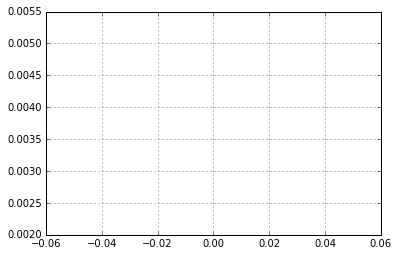

/data/20170602/bead9_15um_QWP/charge2


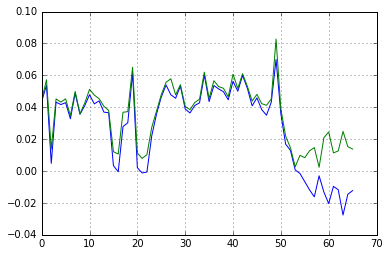

/data/20170616/bead3_15um_QWP/charge1


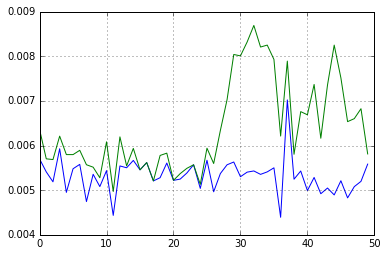

/data/20170616/bead5_15um_QWP/charge1


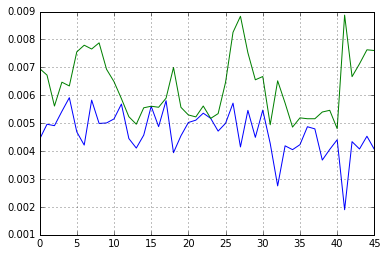

/data/20170616/bead5_15um_QWP/charge2


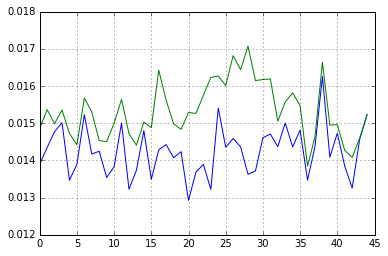

/data/20170616/bead5_15um_QWP/charge3


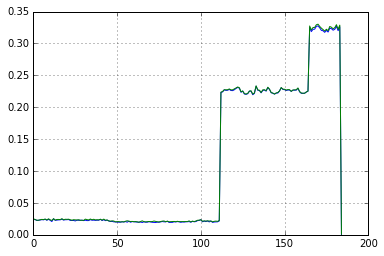

/data/20170619/bead2_15um_QWP/charge1


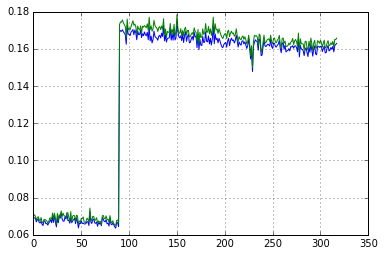

/data/20170619/bead2_15um_QWP/charge2


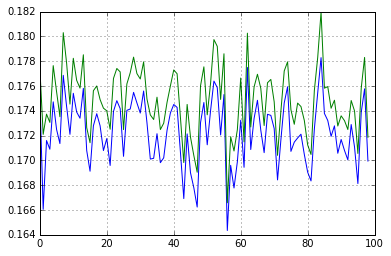

/data/20170619/bead2_15um_QWP/charge3


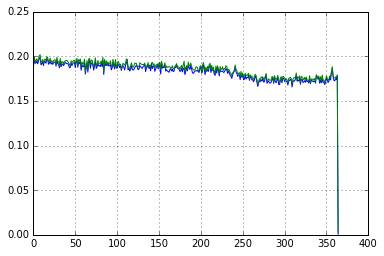

/data/20170619/bead2_15um_QWP/charge4


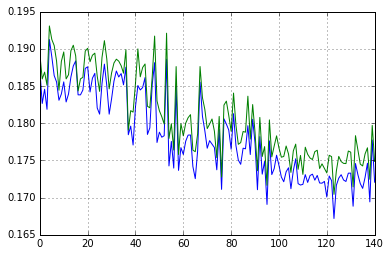

/data/20170619/bead2_15um_QWP/charge5


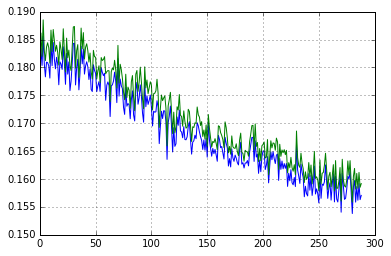

/data/20170619/bead2_15um_QWP/charge6


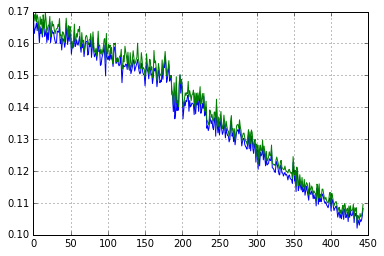

/data/20170619/bead2_15um_QWP/charge7


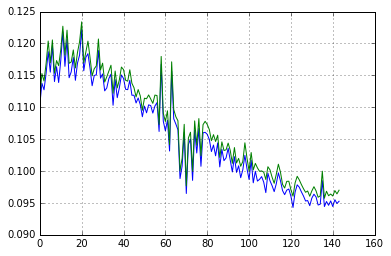

/data/20170619/bead2_15um_QWP/charge8
Warning, got no keys for:  /data/20170619/bead2_15um_QWP/charge8/auto_xyzcool_G5_att_synth30mV41Hz-300mVdc_19.h5


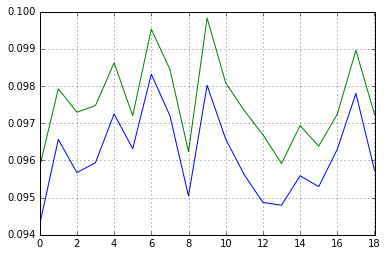

/data/20170619/bead2_15um_QWP/charge9


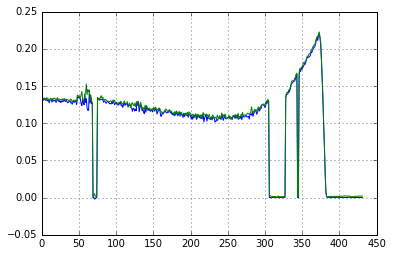

/data/20170619/bead3_15um_QWP/charge1
Warning, got no keys for:  /data/20170619/bead3_15um_QWP/charge1/auto_xyzcool_G5_att_synth10mV41Hz-120mVdc_4.h5
Warning, got no keys for:  /data/20170619/bead3_15um_QWP/charge1/auto_xyzcool_G5_att_synth10mV41Hz-160mVdc_271.h5


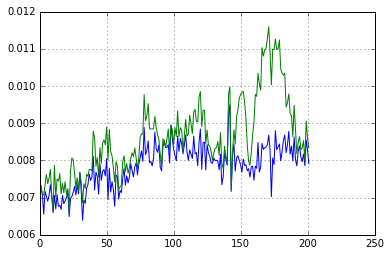

/data/20170619/bead3_15um_QWP/charge2


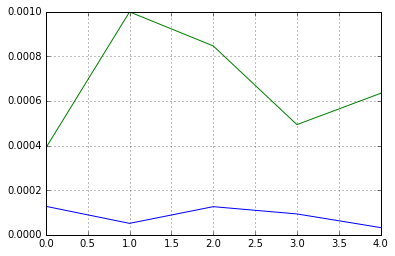

/data/20170619/bead5_15um_QWP/charge1
Warning, got no keys for:  /data/20170619/bead5_15um_QWP/charge1/auto_xyzcool_G5_att_synth10mV41Hz-50mVdc_26.h5


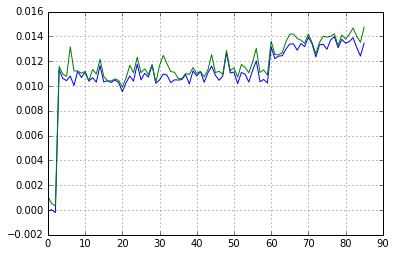

/data/20170620_1/bead1_15um_QWP/charge1
Warning, got no keys for:  /data/20170620_1/bead1_15um_QWP/charge1/auto_xyzcool_G5_att_synth30mV41Hz-140mVdc_94.h5
Warning, got no keys for:  /data/20170620_1/bead1_15um_QWP/charge1/auto_xyzcool_G5_att_synth40mV41Hz-190mVdc_103.h5


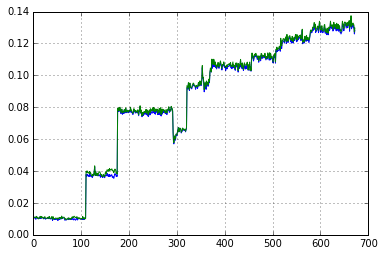

/data/20170620_1/bead2_15um_QWP/charge1


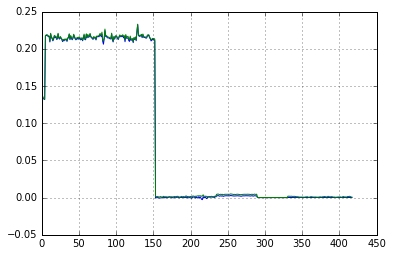

/data/20170620_1/bead3_15um_QWP/charge1


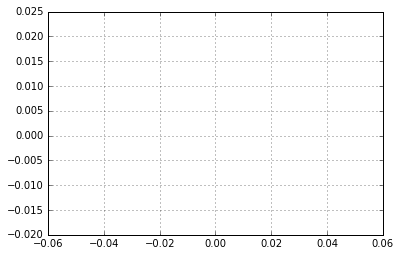

/data/20170620_1/bead4_15um_QWP/charge1


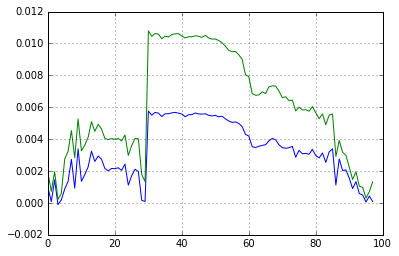

/data/20170620_1/bead4_15um_QWP/charge10


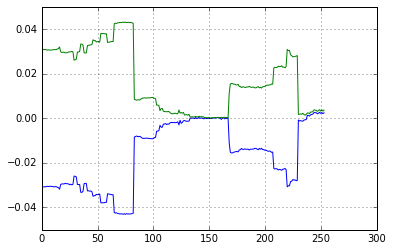

/data/20170620_1/bead4_15um_QWP/charge11


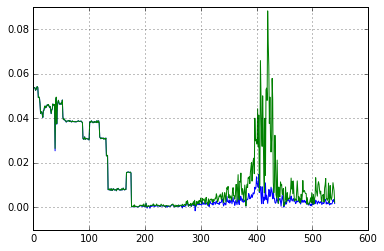

/data/20170620_1/bead4_15um_QWP/charge12


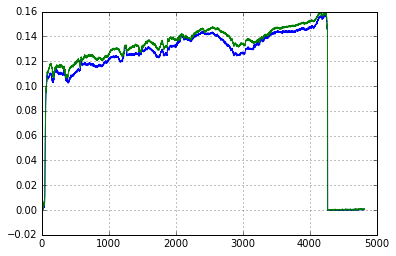

/data/20170620_1/bead4_15um_QWP/charge2
Warning, got no keys for:  /data/20170620_1/bead4_15um_QWP/charge2/3_6E-5mbar_xyzcool_G5_att_synth450mV41Hz-500mVdc_168.h5


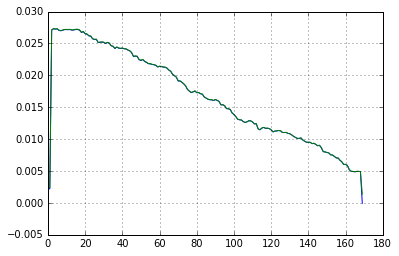

/data/20170620_1/bead4_15um_QWP/charge3


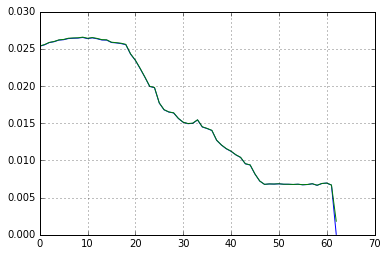

/data/20170620_1/bead4_15um_QWP/charge4


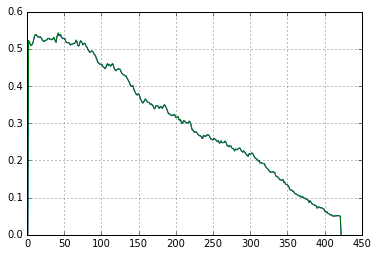

/data/20170620_1/bead4_15um_QWP/charge5


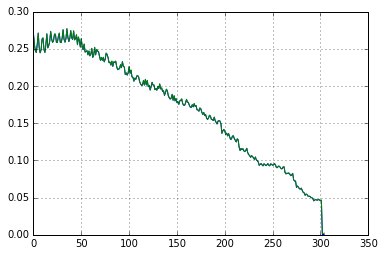

/data/20170620_1/bead4_15um_QWP/charge6
Warning, got no keys for:  /data/20170620_1/bead4_15um_QWP/charge6/auto_xyzcool_G50_att_synth500mV41Hz-800mVdc_290.h5


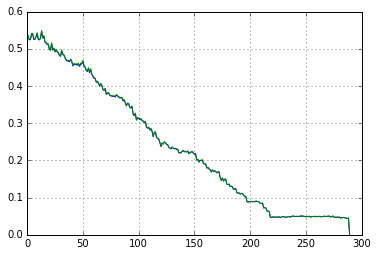

/data/20170620_1/bead4_15um_QWP/charge7
Warning, got no keys for:  /data/20170620_1/bead4_15um_QWP/charge7/auto_xyzcool_G50_att_synth50mV41Hz0mVdc_139.h5
Warning, got no keys for:  /data/20170620_1/bead4_15um_QWP/charge7/auto_xyzcool_G50_att_synth50mV41Hz-60mVdc_28.h5


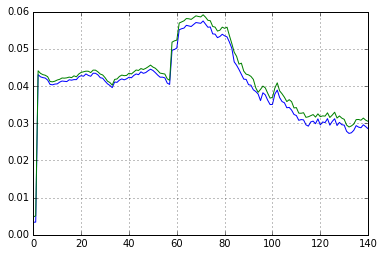

/data/20170620_1/bead4_15um_QWP/charge8
Warning, got no keys for:  /data/20170620_1/bead4_15um_QWP/charge8/auto_xyzcool_G50_att_synth900mV41Hz-100mVdc_161.h5


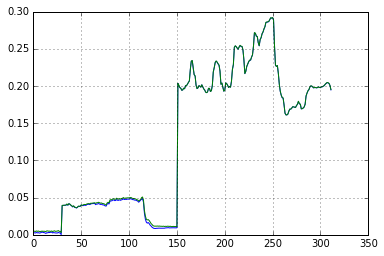

/data/20170620_1/bead4_15um_QWP/charge9
Warning, got no keys for:  /data/20170620_1/bead4_15um_QWP/charge9/auto_xyzcool_G50_att_synth100mV41Hz-500mVdc_208.h5


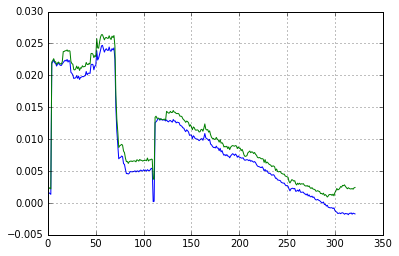

/data/20170620_1/bead6_15um_QWP/charge1


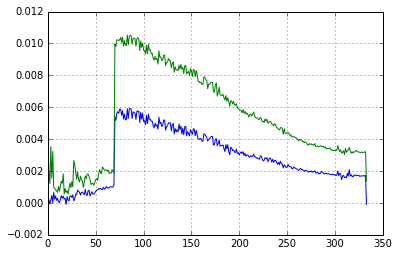

/data/20170620_1/bead6_15um_QWP/charge10


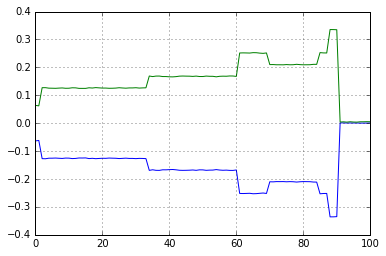

/data/20170620_1/bead6_15um_QWP/charge11


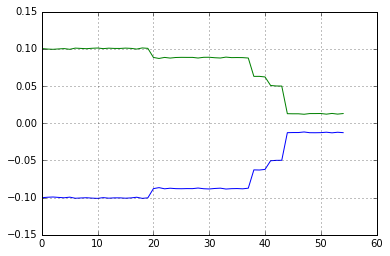

/data/20170620_1/bead6_15um_QWP/charge12


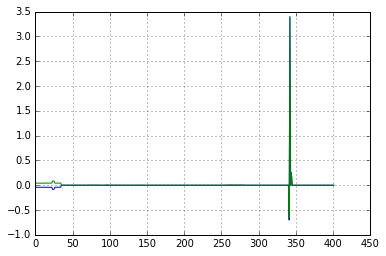

/data/20170620_1/bead6_15um_QWP/charge2


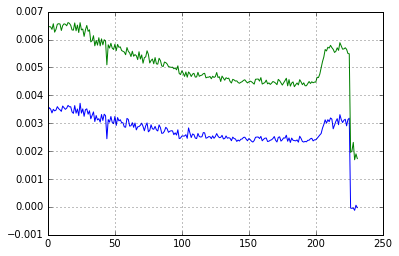

/data/20170620_1/bead6_15um_QWP/charge3


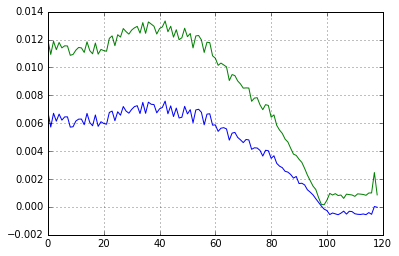

/data/20170620_1/bead6_15um_QWP/charge4


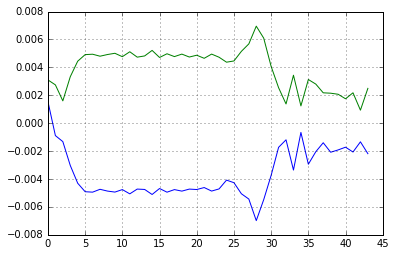

/data/20170620_1/bead6_15um_QWP/charge5
Warning, got no keys for:  /data/20170620_1/bead6_15um_QWP/charge5/auto_xyzcool_G5_att_synth800mV34Hz0mVdc_1.h5


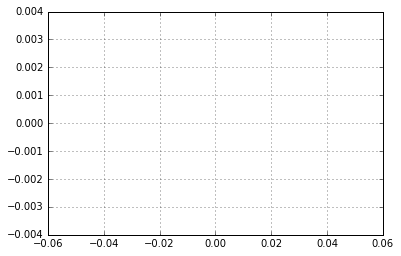

/data/20170620_1/bead6_15um_QWP/charge7


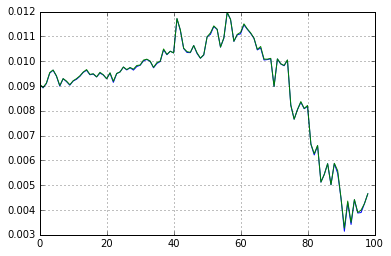

/data/20170620_1/bead6_15um_QWP/charge8


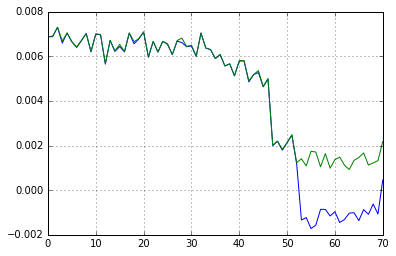

/data/20170620_1/bead6_15um_QWP/charge9


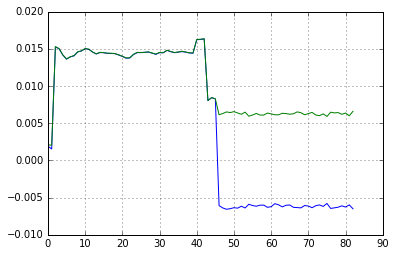

/data/20170622/bead3_15um_QWP/charge1


ValueError: need more than 0 values to unpack

In [4]:
for path in directory_names:
    print path
    ts = 1.

    fdrive = 41.
    make_plot = True

    data_columns = [0, bu.xi] ## column to calculate the correlation against
    drive_column = bu.drive ##-1 ## column containing drive signal

    best_phase = []
    corr = []

    for i in np.arange(len(list_file_time_order(path))):
            try:
                    best_phase.append(getphase( list_file_time_order(path)[i] ))
                    corr.append(getdata(list_file_time_order(path)[i],best_phase[i]))
            except:
                    continue

    X, Y = zip(*corr)

    #print 'mean'
    #print np.mean(X)
    #print 'std'
    #print np.std(X)/np.sqrt(len(X))

    plt.plot(corr)
    plt.grid()
    plt.show()

In [8]:
n = len(['/data/20170602/bead1_15um_QWP/TEST_DAQ/charge',
 '/data/20170602/bead4_15um_QWP/charge1',
 '/data/20170602/bead9_15um_QWP/charge1',
 '/data/20170602/bead9_15um_QWP/charge2',
 '/data/20170616/bead3_15um_QWP/charge1',
 '/data/20170616/bead5_15um_QWP/charge1',
 '/data/20170616/bead5_15um_QWP/charge2',
 '/data/20170616/bead5_15um_QWP/charge3',
 '/data/20170619/bead2_15um_QWP/charge1',
 '/data/20170619/bead2_15um_QWP/charge2',
 '/data/20170619/bead2_15um_QWP/charge3',
 '/data/20170619/bead2_15um_QWP/charge4',
 '/data/20170619/bead2_15um_QWP/charge5',
 '/data/20170619/bead2_15um_QWP/charge6',
 '/data/20170619/bead2_15um_QWP/charge7',
 '/data/20170619/bead2_15um_QWP/charge8',
 '/data/20170619/bead2_15um_QWP/charge9',
 '/data/20170619/bead3_15um_QWP/charge1',
 '/data/20170619/bead3_15um_QWP/charge2',
 '/data/20170619/bead5_15um_QWP/charge1',
 '/data/20170620_1/bead1_15um_QWP/charge1',
 '/data/20170620_1/bead2_15um_QWP/charge1',
 '/data/20170620_1/bead3_15um_QWP/charge1',
 '/data/20170620_1/bead4_15um_QWP/charge1',
 '/data/20170620_1/bead4_15um_QWP/charge10',
 '/data/20170620_1/bead4_15um_QWP/charge11',
 '/data/20170620_1/bead4_15um_QWP/charge12',
 '/data/20170620_1/bead4_15um_QWP/charge2',
 '/data/20170620_1/bead4_15um_QWP/charge3',
 '/data/20170620_1/bead4_15um_QWP/charge4',
 '/data/20170620_1/bead4_15um_QWP/charge5',
 '/data/20170620_1/bead4_15um_QWP/charge6',
 '/data/20170620_1/bead4_15um_QWP/charge7',
 '/data/20170620_1/bead4_15um_QWP/charge8',
 '/data/20170620_1/bead4_15um_QWP/charge9',
 '/data/20170620_1/bead6_15um_QWP/charge1',
 '/data/20170620_1/bead6_15um_QWP/charge10',
 '/data/20170620_1/bead6_15um_QWP/charge11',
 '/data/20170620_1/bead6_15um_QWP/charge12',
 '/data/20170620_1/bead6_15um_QWP/charge2',
 '/data/20170620_1/bead6_15um_QWP/charge3',
 '/data/20170620_1/bead6_15um_QWP/charge4',
 '/data/20170620_1/bead6_15um_QWP/charge5',
 '/data/20170620_1/bead6_15um_QWP/charge7',
 '/data/20170620_1/bead6_15um_QWP/charge8',
 '/data/20170620_1/bead6_15um_QWP/charge9',
 '/data/20170622/bead3_15um_QWP/charge1',])

directory_names[n:]

['/data/20170622/bead4_15um_QWP/arb_charge',
 '/data/20170622/bead4_15um_QWP/charge1',
 '/data/20170622/bead4_15um_QWP/charge10',
 '/data/20170622/bead4_15um_QWP/charge11',
 '/data/20170622/bead4_15um_QWP/charge11_fast',
 '/data/20170622/bead4_15um_QWP/charge14',
 '/data/20170622/bead4_15um_QWP/charge2',
 '/data/20170622/bead4_15um_QWP/charge3',
 '/data/20170622/bead4_15um_QWP/charge4',
 '/data/20170622/bead4_15um_QWP/charge5',
 '/data/20170622/bead4_15um_QWP/charge6',
 '/data/20170622/bead4_15um_QWP/charge7',
 '/data/20170622/bead4_15um_QWP/charge8',
 '/data/20170622/bead4_15um_QWP/charge9',
 '/data/20170622/bead4_15um_QWP/charge_13',
 '/data/20170622/bead4_15um_QWP/charge_14',
 '/data/20170622/bead4_15um_QWP/charge_41_47_calibration',
 '/data/20170628/bead1_15um_QWP/charge1',
 '/data/20170628/bead1_15um_QWP/charge2',
 '/data/20170628/bead1_15um_QWP/charge3',
 '/data/20170628/bead1_15um_QWP/charge4',
 '/data/20170628/bead1_15um_QWP/charge5',
 '/data/20170628/bead1_15um_QWP/charge6',
 

/data/20170622/bead3_15um_QWP/charge1
/data/20170622/bead4_15um_QWP/arb_charge


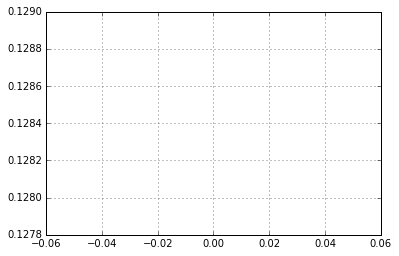

/data/20170622/bead4_15um_QWP/charge1


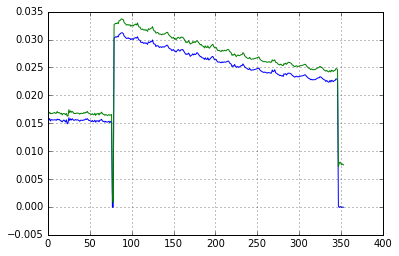

/data/20170622/bead4_15um_QWP/charge10


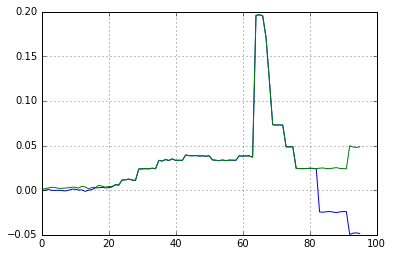

/data/20170622/bead4_15um_QWP/charge11


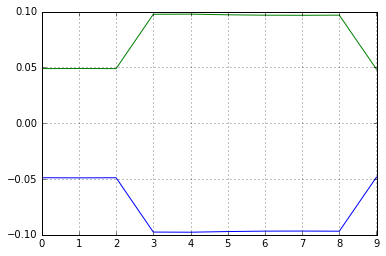

/data/20170622/bead4_15um_QWP/charge11_fast
Warning, got no keys for:  /data/20170622/bead4_15um_QWP/charge11_fast/auto_xyzcool_G100_att_synth1000mV41Hz0mVdc_30.h5


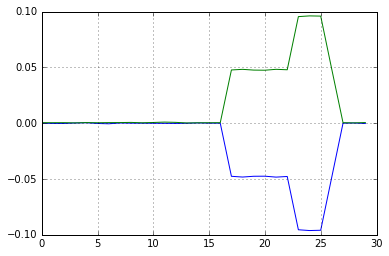

/data/20170622/bead4_15um_QWP/charge14


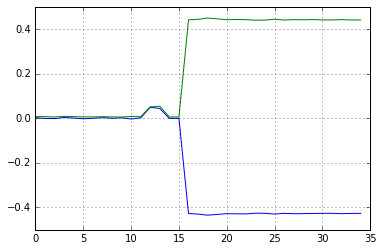

/data/20170622/bead4_15um_QWP/charge2


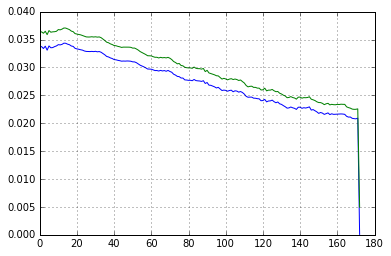

/data/20170622/bead4_15um_QWP/charge3


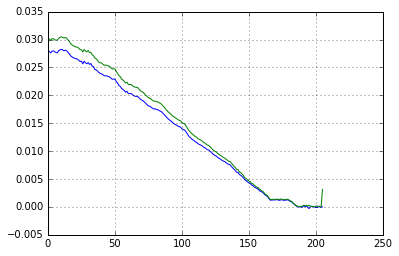

/data/20170622/bead4_15um_QWP/charge4


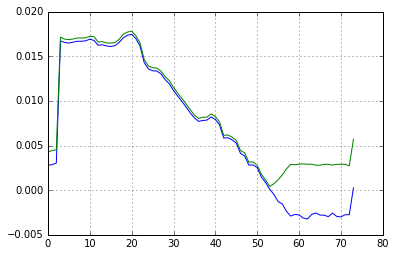

/data/20170622/bead4_15um_QWP/charge5
Warning, got no keys for:  /data/20170622/bead4_15um_QWP/charge5/7_6E-6mbar_xyzcool_G5_att_synth600mV34Hz0mVdc_1.h5


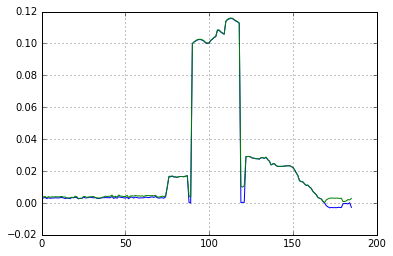

/data/20170622/bead4_15um_QWP/charge6


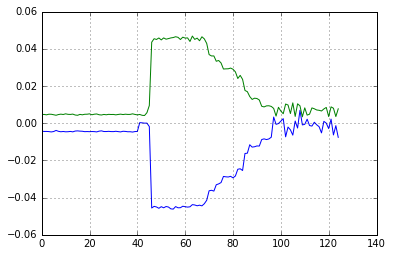

/data/20170622/bead4_15um_QWP/charge7


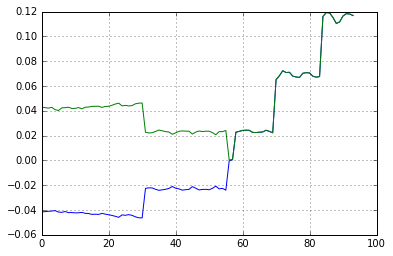

/data/20170622/bead4_15um_QWP/charge8


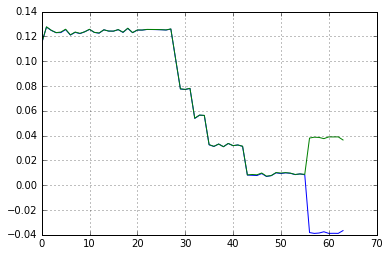

/data/20170622/bead4_15um_QWP/charge9


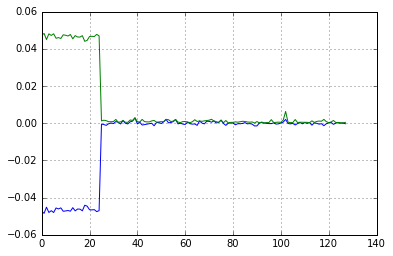

/data/20170622/bead4_15um_QWP/charge_13


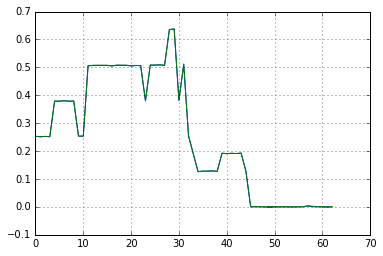

/data/20170622/bead4_15um_QWP/charge_14


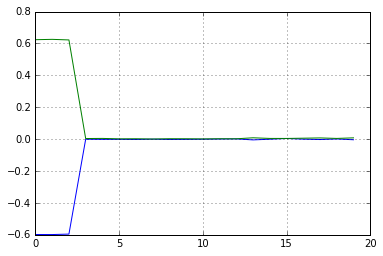

/data/20170622/bead4_15um_QWP/charge_41_47_calibration


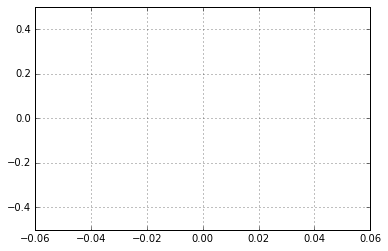

/data/20170628/bead1_15um_QWP/charge1
Warning, got no keys for:  /data/20170628/bead1_15um_QWP/charge1/1_2E-5mbar_xyzcool_G5_att_synth1000mV2500Hz0mVdc_367.h5


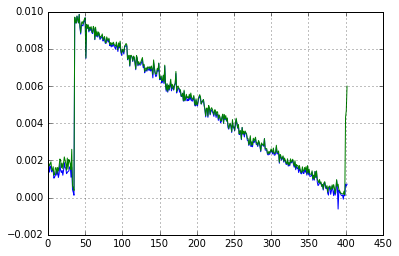

/data/20170628/bead1_15um_QWP/charge2
Warning, got no keys for:  /data/20170628/bead1_15um_QWP/charge2/1_2E-5mbar_xyzcool_G5_att_synth500mV41Hz0mVdc_23.h5


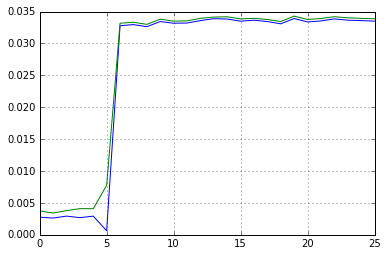

/data/20170628/bead1_15um_QWP/charge3


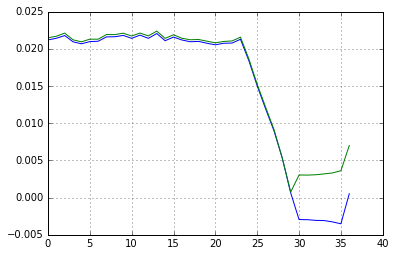

/data/20170628/bead1_15um_QWP/charge4


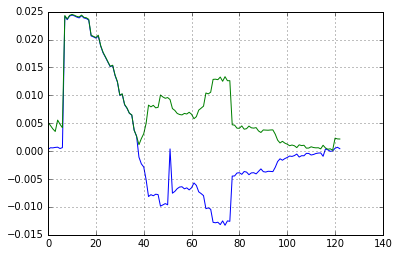

/data/20170628/bead1_15um_QWP/charge5


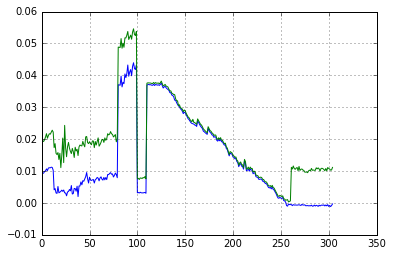

/data/20170628/bead1_15um_QWP/charge6


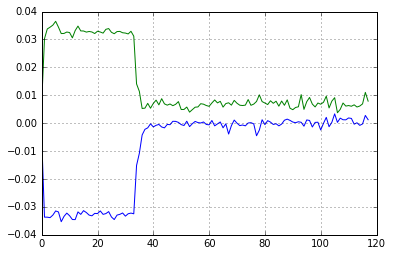

/data/20170628/bead1_15um_QWP/charge7
Warning, got no keys for:  /data/20170628/bead1_15um_QWP/charge7/auto_xyzcool_G100_att_synth150mV47Hz0mVdc_16.h5


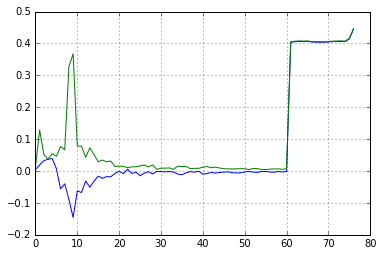

/data/20170629/bead2_15um_QWP/charge1


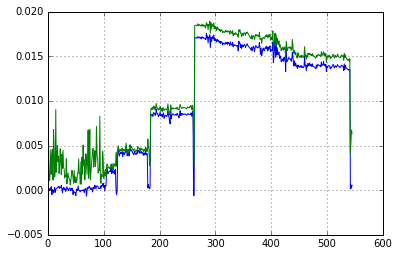

/data/20170629/bead2_15um_QWP/charge10


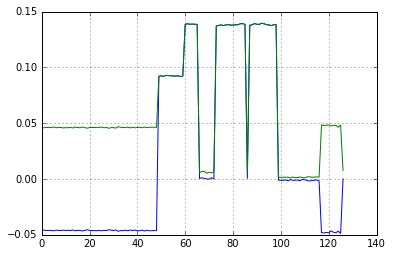

/data/20170629/bead2_15um_QWP/charge11


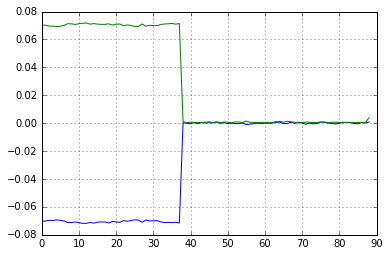

/data/20170629/bead2_15um_QWP/charge2


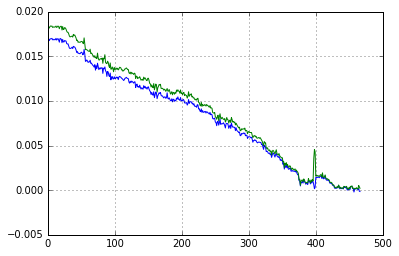

/data/20170629/bead2_15um_QWP/charge3
Warning, got no keys for:  /data/20170629/bead2_15um_QWP/charge3/3_4E-6mbar_xyzcool_G5_att_synth2000mV2700Hz0mVdc_221.h5


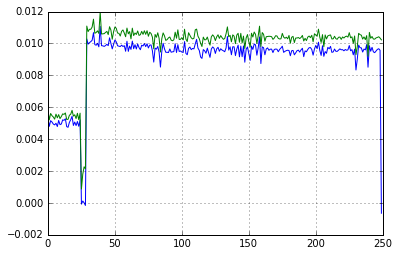

/data/20170629/bead2_15um_QWP/charge4


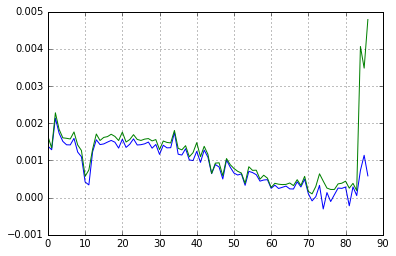

/data/20170629/bead2_15um_QWP/charge5


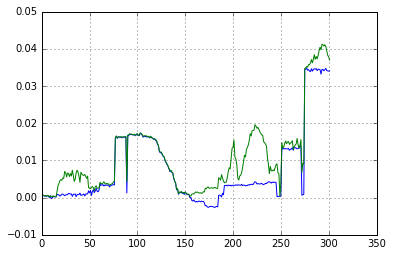

/data/20170629/bead2_15um_QWP/charge6


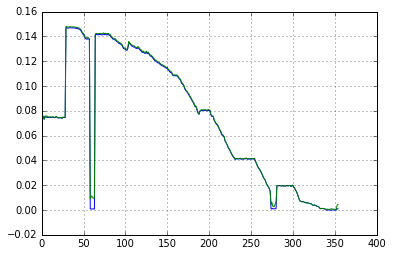

/data/20170629/bead2_15um_QWP/charge7


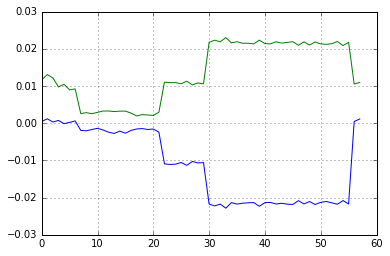

/data/20170629/bead2_15um_QWP/charge8
Warning, got no keys for:  /data/20170629/bead2_15um_QWP/charge8/auto_xyzcool_G100_att_trek_synth800mV3000Hz0mVdc_47.h5
Warning, got no keys for:  /data/20170629/bead2_15um_QWP/charge8/auto_xyzcool_G100_att_trek_synth2500mV3000Hz0mVdc_42.h5
Warning, got no keys for:  /data/20170629/bead2_15um_QWP/charge8/auto_xyzcool_G100_att_trek_synth40mV41Hz-400mVdc_14.h5


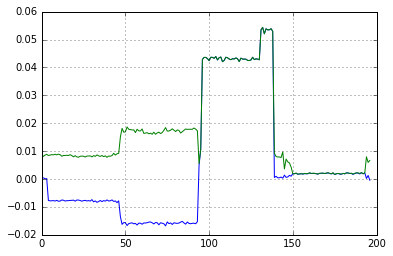

/data/20170629/bead2_15um_QWP/charge9


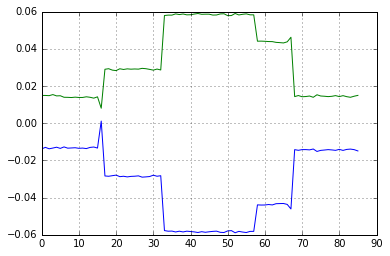

/data/20170630/bead1_15um_QWP/charge1


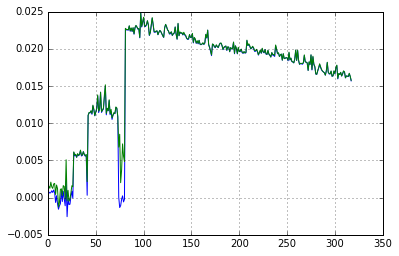

/data/20170630/bead1_15um_QWP/charge2


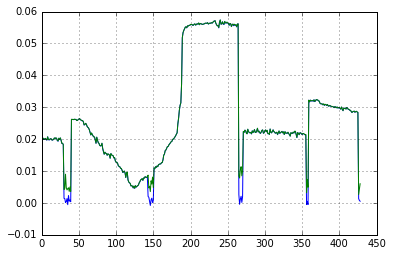

/data/20170630/bead1_15um_QWP/charge3


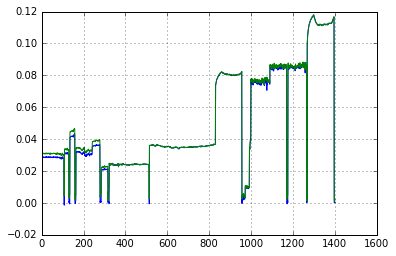

/data/20170630/bead1_15um_QWP/charge4
Warning, got no keys for:  /data/20170630/bead1_15um_QWP/charge4/2_4E-6mbar_xyzcool_G5_att_synth200mV41Hz0mVdc_5.h5


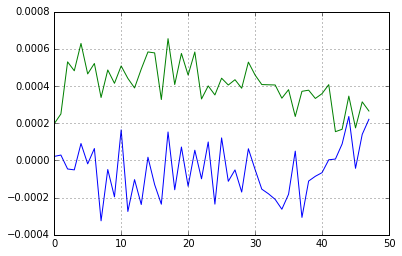

/data/20170630/bead3_15um_QWP/charge1


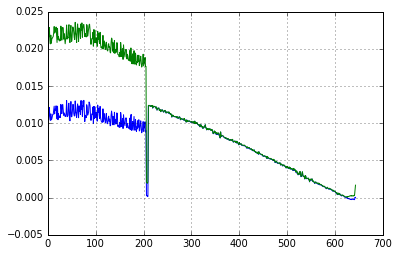

/data/20170630/bead3_15um_QWP/charge2


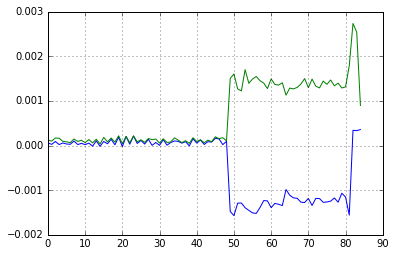

/data/20170630/bead3_15um_QWP/charge3


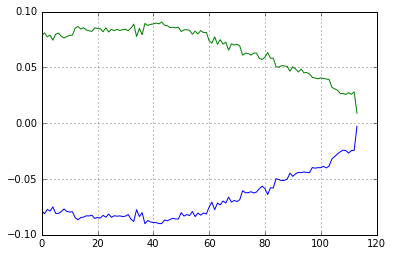

/data/20170630/bead3_15um_QWP/charge4


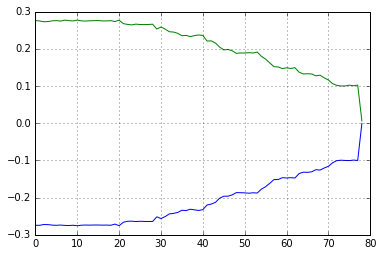

/data/20170630/bead3_15um_QWP/charge5


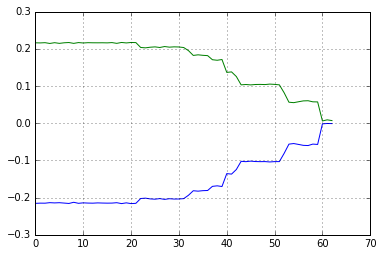

/data/20170630/bead3_15um_QWP/charge6
Warning, got no keys for:  /data/20170630/bead3_15um_QWP/charge6/auto_xyzcool_G100_att_synth500mV47Hz0mVdc_69.h5


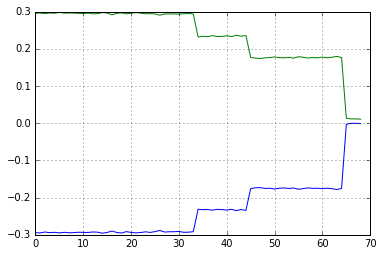

/data/20170630/bead3_15um_QWP/charge7


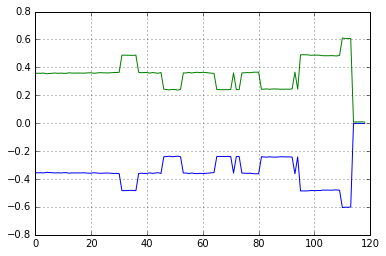

/data/20170630/bead3_15um_QWP/charge8


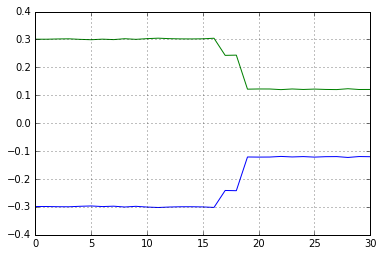

/data/20170630/bead3_15um_QWP/charge9


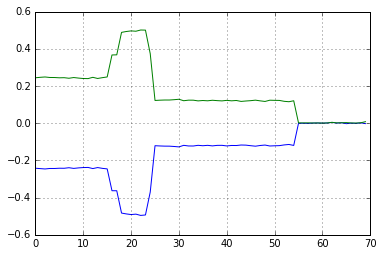

In [9]:
for path in directory_names[n-1:]:
    print path
    ts = 1.

    fdrive = 41.
    make_plot = True

    data_columns = [0, bu.xi] ## column to calculate the correlation against
    drive_column = bu.drive ##-1 ## column containing drive signal




    best_phase = []
    corr = []

    for i in np.arange(len(list_file_time_order(path))):
            try:
                    best_phase.append(getphase( list_file_time_order(path)[i] ))
                    corr.append(getdata(list_file_time_order(path)[i],best_phase[i]))
            except:
                    continue

    try:
        X, Y = zip(*corr)
    except:
        continue

    #print 'mean'
    #print np.mean(X)
    #print 'std'
    #print np.std(X)/np.sqrt(len(X))


    plt.plot(corr)
    plt.grid()
    plt.show()

/data/20170630/bead3_15um_QWP/charge6
Warning, got no keys for:  /data/20170630/bead3_15um_QWP/charge6/auto_xyzcool_G100_att_synth500mV47Hz0mVdc_69.h5


<IPython.core.display.Javascript object>


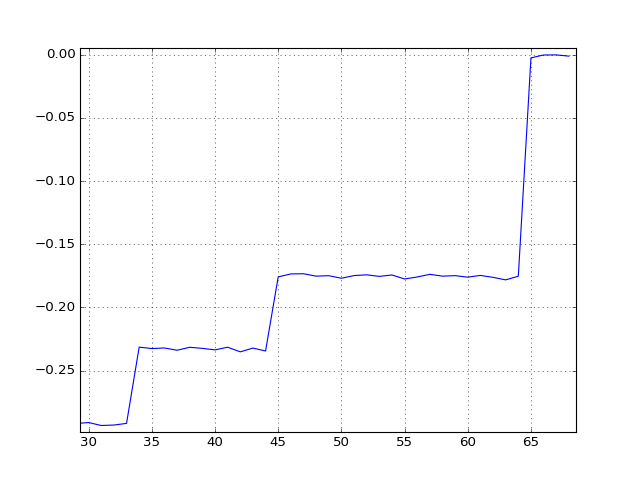

/data/20170622/bead4_15um_QWP/charge11_fast
Warning, got no keys for:  /data/20170622/bead4_15um_QWP/charge11_fast/auto_xyzcool_G100_att_synth1000mV41Hz0mVdc_30.h5


<IPython.core.display.Javascript object>


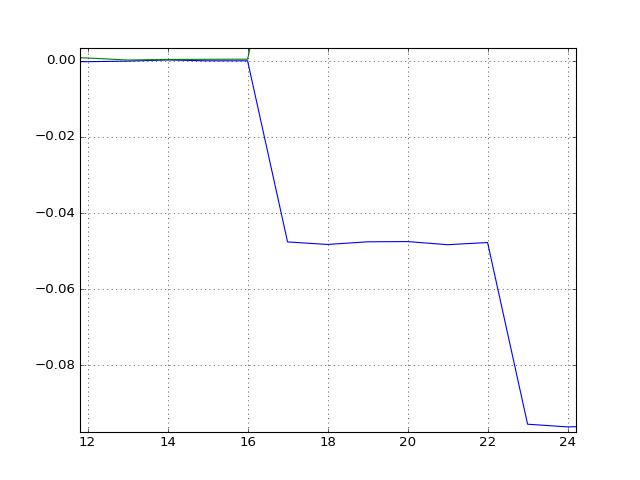

/data/20170620_1/bead4_15um_QWP/charge11


<IPython.core.display.Javascript object>


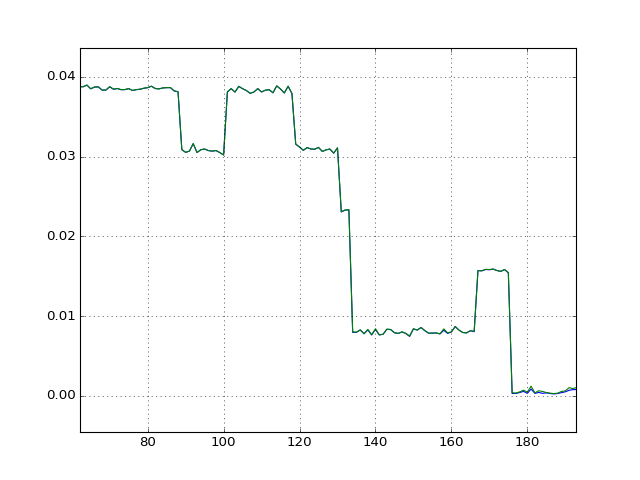

/data/20170630/bead3_15um_QWP/charge9


<IPython.core.display.Javascript object>


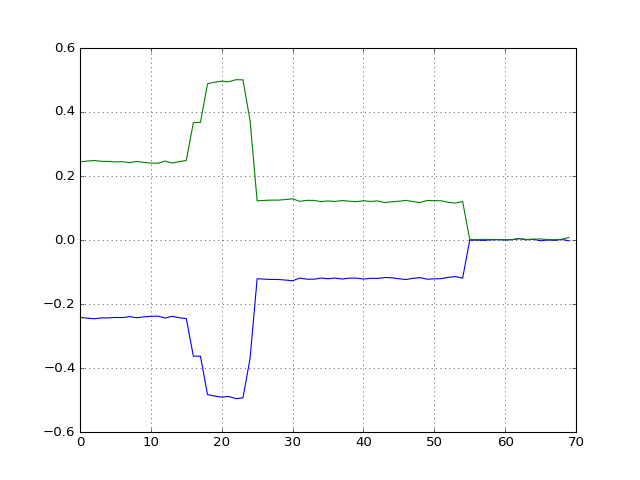

In [11]:
%matplotlib notebook

ndirs = ['/data/20170630/bead3_15um_QWP/charge6', 
'/data/20170622/bead4_15um_QWP/charge11_fast', 
'/data/20170620_1/bead4_15um_QWP/charge11', #100-300
'/data/20170630/bead3_15um_QWP/charge9']

for path in ndirs:
    print path
    data_columns = [0, bu.xi] ## column to calculate the correlation against
    drive_column = bu.drive ##-1 ## column containing drive signal

    best_phase = []
    corr = []

    for i in np.arange(len(list_file_time_order(path))):
            try:
                    best_phase.append(getphase( list_file_time_order(path)[i] ))
                    corr.append(getdata(list_file_time_order(path)[i],best_phase[i]))
            except:
                    continue

    try:
        X, Y = zip(*corr)
    except:
        continue

    plt.figure()
    plt.plot(corr)
    plt.grid()
    plt.show()

In [14]:
def getdata(fname):
    #print "Processing ", fname
    dat, attribs, cf = bu.getdata(os.path.join(path, fname))

    fsamp = attribs["Fsamp"]
    fdrive = correlation.getFDrive(fname)

    xdat = dat[:,0]

    MinusDC = dat[:,7]
    corr_full = bu.corr_func(MinusDC - np.median(MinusDC), xdat, fsamp, fdrive)

    return corr_full[0]

Warning, got no keys for:  /data/20170630/bead3_15um_QWP/charge6/auto_xyzcool_G100_att_synth500mV47Hz0mVdc_69.h5


<IPython.core.display.Javascript object>


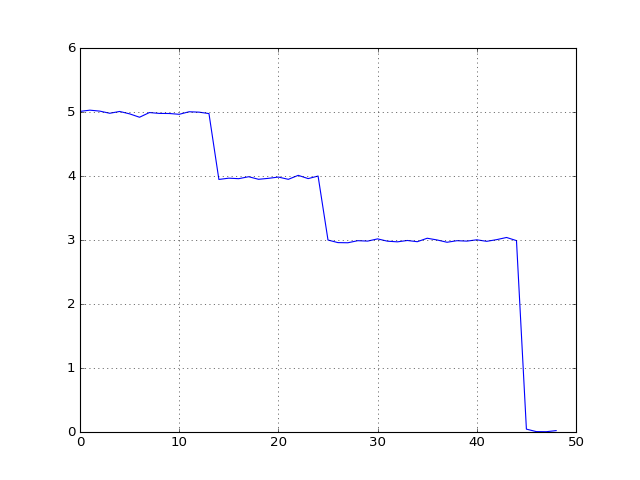

In [17]:
ndirs = ['/data/20170630/bead3_15um_QWP/charge6', 
'/data/20170622/bead4_15um_QWP/charge11_fast', 
'/data/20170620_1/bead4_15um_QWP/charge11', #100-300
'/data/20170630/bead3_15um_QWP/charge9']

path = '/data/20170630/bead3_15um_QWP/charge6'
file_list = list_file_time_order(path)

best_phase = []
corr = []

for f in file_list:
    try:
        corr.append(getdata(f))
    except:
        continue

norm = np.average(corr[:33])/5

plt.figure()
plt.plot(corr[20:]/norm)
plt.grid()
plt.show()